In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

labels = ['age', 'operation_year', 'axil_nodes', 'survived_status']
dataset=pd.read_csv("haberman.csv",names=labels)

print(dataset.shape)

(306, 4)


There are 306 datapoints in the dataset and 4 features.

In [3]:
print(dataset.columns)

Index(['age', 'operation_year', 'axil_nodes', 'survived_status'], dtype='object')


In [7]:
dataset.describe()

,age,operation_year,axil_nodes,survived_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survived_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [11]:
dataset['survived_status'].value_counts()

1    225
2     81
Name: survived_status, dtype: int64

From this, we can infer that almost 75% of survived 5 years or longer and rest 25% survived less than 5 years.

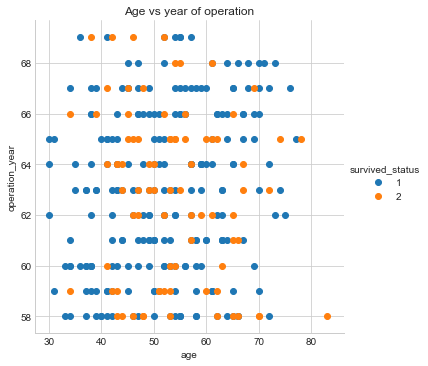

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(plt.scatter,"age","operation_year").add_legend()
plt.title('Age vs year of operation')
plt.show()

This is a scatter plot of age vs operation_year. We cannot infer anything from the above graphical view. We can just say that most cases lie in the age group 40-70 years. 

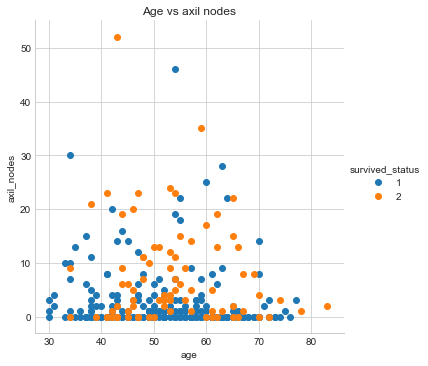

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(plt.scatter,"age","axil_nodes").add_legend()
plt.title('Age vs axil nodes')
plt.show()

This is a scatter plot of age vs axil_nodes. We can only observe that lot of cases have axil_nodes=0. Very less number of cases are there with greater number of axil nodes. Patients with 0 axil nodes are more likely to survive. Patients with higher axil nodes and age are more likely to die.

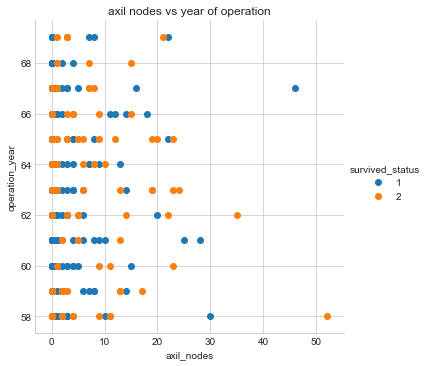

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(plt.scatter,"axil_nodes","operation_year").add_legend()
plt.title('axil nodes vs year of operation')
plt.show()

This is a scatter plot of axil_nodes vs operation_year. We can see that operations were done in the year age 1958-1968. No relation between nodes and year can be inferred.

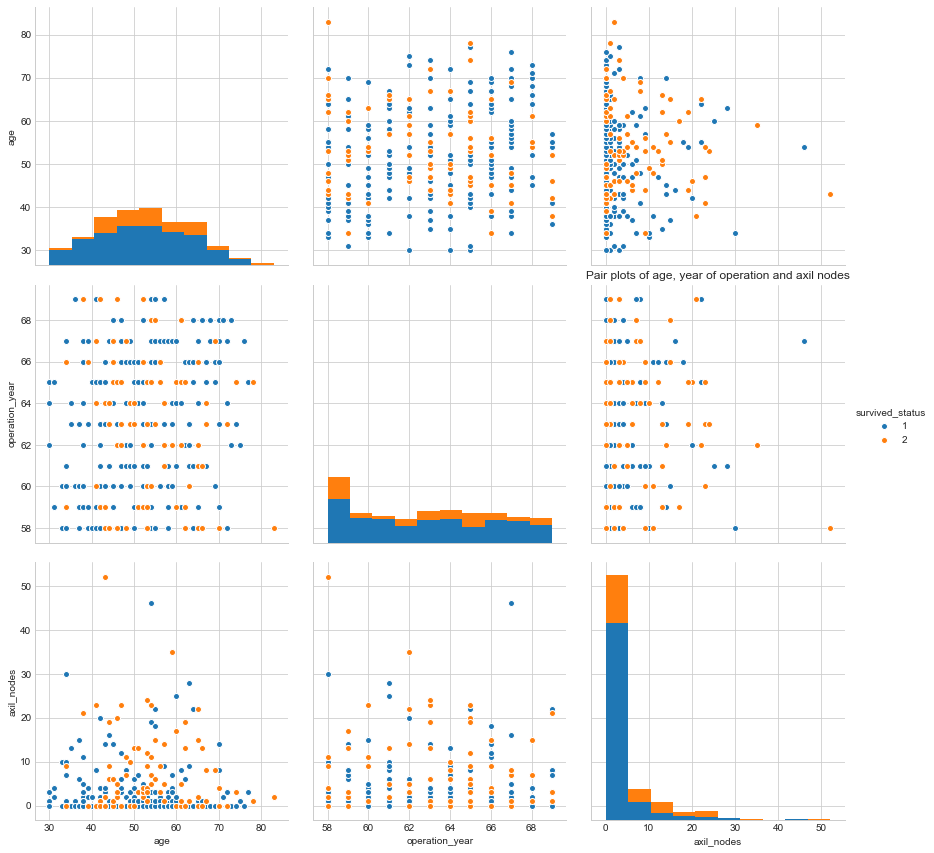

In [20]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="survived_status",vars=['age','operation_year','axil_nodes'],size=4)
plt.title('Pair plots of age, year of operation and axil nodes')
plt.show()

No two feature can linearly separate the survived and not survived class. We can say that lesser the axil nodes more is the chance of survival.

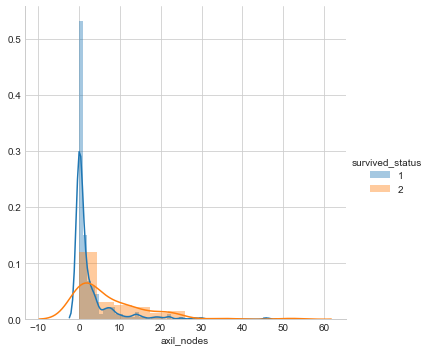

In [23]:
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(sns.distplot,'axil_nodes').add_legend()
plt.show()


We can conclude that patients having zero axil nodes have greater chance of surving.

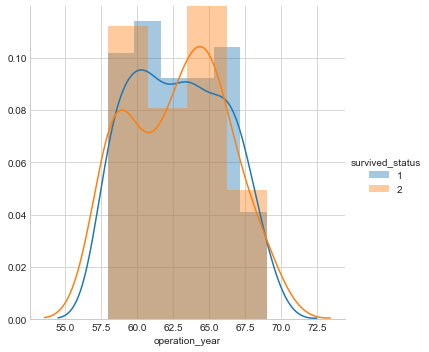

In [24]:
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(sns.distplot,'operation_year').add_legend()
plt.show()

Nothing for survival status can be said from the year of operation.

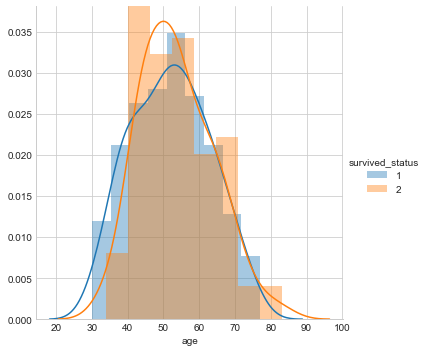

In [25]:
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue="survived_status",size=5).map(sns.distplot,'age').add_legend()
plt.show()

Here we can see that patients below the age of 40, are more likely to survive. 

In [28]:
counts, bin_edges = np.histogram(dataset['axil_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


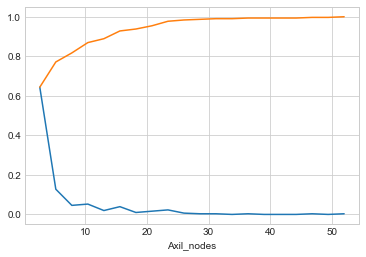

In [29]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.show()

This shows that survival chances are highest when axil node < 10.

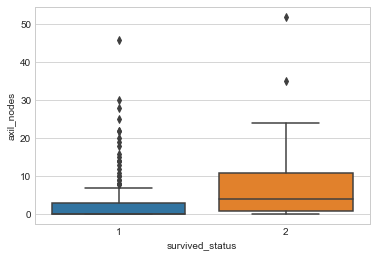

In [30]:
sns.boxplot(x='survived_status',y='axil_nodes', data=dataset)
plt.show()

This shows that lesser the axil nodes, more chances of survival.

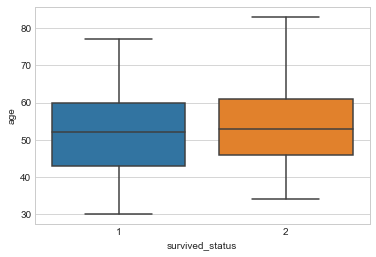

In [31]:
sns.boxplot(x='survived_status',y='age', data=dataset)
plt.show()

The patient can survive if the age is below 40-42 years.

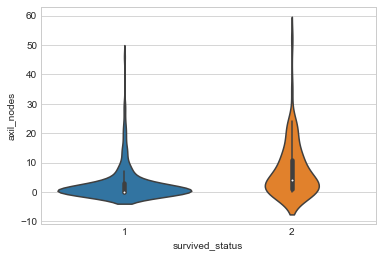

In [32]:
sns.violinplot(x='survived_status',y='axil_nodes', data=dataset)
plt.show()

Again we can conclude that patients with zero axil nodes have greater survival chances.

Summary : 
 1. The age group of patients lie in 40-70 years (min:30,max:80).
 2. Large number of operation took place between 1958 to 1968.
 3. Axil nodes can be considered as the most important feature to get the survival status.
 4. Patient have the largest number of survival chances with zero axil node.
 5. As number of axil nodes and age increases, the chances of survival decreases.
 6. Patients below 40 years of age have greater survival chances.
 7. No two features can linearly separate the survival status i.e. no two features can decide the survival status of a patient.
 8. It is very less likely to have patients with axil nodes more than 30.
 9. Patients with axil nodes>1 and age > 45 are more likely to die.